<a href="https://colab.research.google.com/github/farhanfuadabir/SHL2020/blob/master/SHL_featureAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def createBatch(data, batch_size = 1000, random_state=None):

  """
  Randomly selects `batch_size` entries of each label from the dataset 

  Parameters:

      data          : The dataset to create small batch from. 
                      This must be a DataFrame.
      batch_size    : Batch size of each label
      random_state  : Seed for the random number generator (if int), or numpy 
                      RandomState object.
  
  Returns:

      Series or DataFrame
  """

  y = data.label
  num_label = y.nunique()
  newDataBatch = pd.DataFrame(columns=data.columns)
  
  for i in range(1, num_label + 1):
    data_i = data.loc[y == i, :].sample(n=batch_size, random_state=random_state)
    newDataBatch = pd.concat([newDataBatch, data_i], axis=0)
  return newDataBatch

def random_split_half(data, random_state=123):

  import pandas as pd

  y = data.label
  num_label = y.nunique()
  newDataBatch1 = pd.DataFrame(columns=data.columns)
  
  for i in range(1, num_label + 1):
    data_i = data.loc[y == i, :].sample(frac=0.5, random_state=random_state)
    newDataBatch1 = pd.concat([newDataBatch1, data_i], axis=0)
  newDataBatch2 = pd.concat([data, newDataBatch1], axis=0)
  newDataBatch2 = newDataBatch2.drop_duplicates(keep=False)
  return newDataBatch1, newDataBatch2

def feature_scaling(X):

  from sklearn.preprocessing import MinMaxScaler
  
  scaler = MinMaxScaler(feature_range=(-1,1))
  X = scaler.fit_transform(X)
  
  return X

In [ ]:
import pandas as pd
import numpy as np


path = '/content/drive/My Drive/SHL_2020_DATASET_PICKLED/'
trainPrefix = 'train_2020'
cvPrefix = 'validation_2020'
position = '_hand'

#Unpickle Train Set
print('Unpickling from: ' + trainPrefix + position + '_DATA.pickle ...',end=' ')
data_train = pd.read_pickle(path + trainPrefix + position + '_DATA.pickle')
print('Done | Shape: ', data_train.shape)

#Unpickle Validation Set
print('Unpickling from: ' + cvPrefix + position + '_DATA.pickle ...',end=' ')
data_cv = pd.read_pickle(path + cvPrefix + position + '_DATA.pickle')
print('Done | Shape: ', data_cv.shape)

# Check for nan
if data_train.isna().any().any() == True:
  print('\nnan Detected in Train set')
  # Drop nan rows
  print('Dropping nan rows...',end=' ')
  data_train.dropna(inplace=True)
  print('Done | Shape: ', data_train.shape)

if data_cv.isna().any().any() == True:
  print('\nnan Detected in Validation set')
  # Drop nan rows
  print('Dropping nan rows...',end=' ')
  data_cv.dropna(inplace=True)
  print('Done | Shape: ', data_cv.shape)

# Extract X and y from train set
X = data_train.drop('label', axis=1)
y = data_train.label

print('\nX Shape: ', X.shape, ' |  y Shape: ', y.shape)

# Extract X and y from validation set
X_cv = data_cv.drop('label', axis=1)
y_cv = data_cv.label


Unpickling from: train_2020_hand_DATA.pickle ... Done | Shape:  (196072, 496)
Unpickling from: validation_2020_hand_DATA.pickle ... Done | Shape:  (28789, 496)

X Shape:  (196072, 495)  |  y Shape:  (196072,)


In [ ]:
# Check instances of each lable

print('Instances of each Label of the Dataset: ')
print(y.value_counts())

print('\nCreating mini batch...', end=' ')
data_batch = createBatch(data_train, batch_size=8000, random_state=123)
print('Done | Shape: ', data_batch.shape)

# Merge Half of validation set
train_2, cv_test = random_split_half(data_cv, random_state=123)
data_batch = pd.concat([data_batch, train_2], axis = 0)
print('Merged Train Set Shape: ', data_batch.shape)

# Extract X_test and y_test
X_test = cv_test.drop('label', axis=1)
y_test = cv_test.label

print('\nX_test Shape: ', X_test.shape, ' |  y_test Shape: ', y_test.shape)

# Extract X_new and y_new
X_new = data_batch.drop('label', axis=1)
y_new = data_batch.label

print('\nX Shape: ', X_new.shape, ' |  y Shape: ', y_new.shape)

print('\nInstances of each Label of the new Dataset: ')
print(y_new.value_counts())


Instances of each Label of the Dataset: 
5.0    31733
7.0    31253
6.0    28326
2.0    24544
1.0    24456
8.0    23834
4.0    23473
3.0     8453
Name: label, dtype: int64

Creating mini batch... Done | Shape:  (64000, 496)
Merged Train Set Shape:  (78396, 496)

X_test Shape:  (14393, 495)  |  y_test Shape:  (14393,)

X Shape:  (78396, 495)  |  y Shape:  (78396,)

Instances of each Label of the new Dataset: 
1.0    10984
2.0    10612
7.0    10181
8.0    10171
5.0    10048
4.0     9204
6.0     8918
3.0     8278
Name: label, dtype: int64


In [ ]:
X_new_B = X_new.loc[:, (X_new != X_new.iloc[0]).any()]
#X_new_B = feature_scaling(X_new_B)
print(X_new_B.shape)
#print(X_new_B.max())
#print(X_new_B.min())

X_test_new = X_test.loc[:, (X_new != X_new.iloc[0]).any()]
#X_cv_new = feature_scaling(X_cv_new)
print(X_test_new.shape)
#print(X_cv_new.max())
#print(X_cv_new.min())

(78396, 452)
(14393, 452)


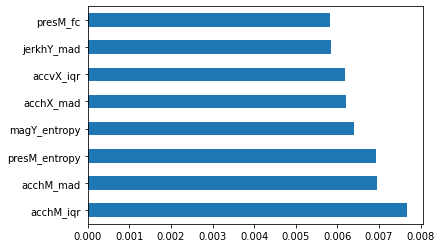

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_new_B,y_new)

#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_new_B.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


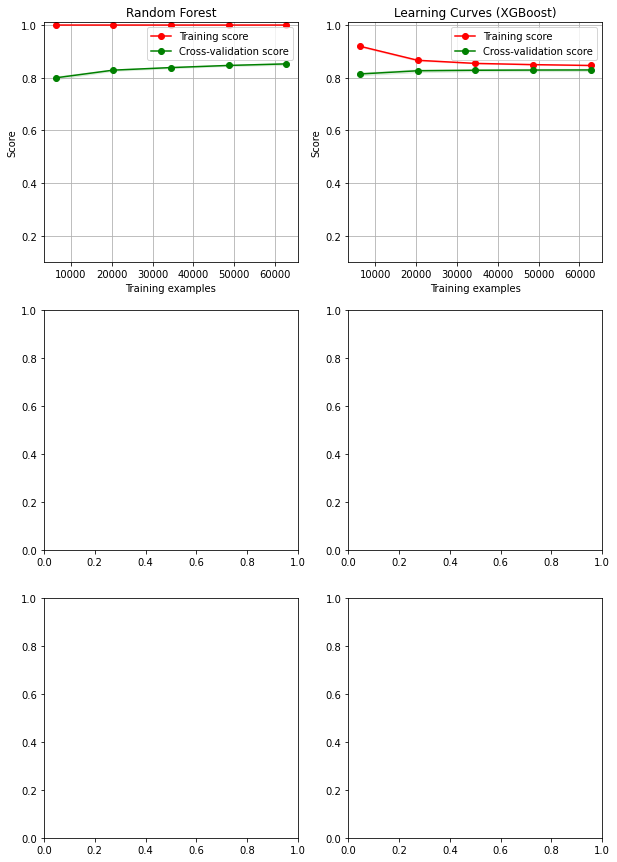

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    '''
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    '''
    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))
#fig, axes = plt.subplots(1, 2, figsize=(10, 15))

###############################################################################
title = "Random Forest"
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=123)

plot_learning_curve(estimator, title, X_new_B, y_new, axes=axes[:, 0], ylim=(0.1, 1.01),
                    cv=cv, n_jobs=-1)

###############################################################################
title = "Learning Curves (XGBoost)"
from xgboost import XGBClassifier
estimator = XGBClassifier()

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=123)

plot_learning_curve(estimator, title, X_new_B, y_new, axes=axes[:, 1], ylim=(0.1, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = XGBClassifier()
scores = cross_val_score(clf, X_new_B, y_new , cv=4,scoring='accuracy')
print("XGBoost Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

clf2 = RandomForestClassifier()
scores = cross_val_score(clf2, X_new_B, y_new, cv=4,scoring='accuracy')
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

XGBoost Accuracy: 0.82 (+/- 0.04)
[0.78918279 0.79957889 0.84326885 0.82892486]
Random Forest Accuracy: 0.82 (+/- 0.05)
[0.79247269 0.80221082 0.85840242 0.84261087]
